In [1]:
!nvcc --version
#Make sure cuda version is atleast 11.0

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!git clone 'https://github.com/NVlabs/stylegan2-ada-pytorch'
#Clone the original github repo to access the pretrained model.

fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.


In [3]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import requests 
file_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    
r = requests.get(file_url, stream = True) 
  
with open("/content/drive/My Drive/cifar-10-python.tar.gz", "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

In [5]:
!pip install -q torch==1.8.1 
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3
!python '/content/stylegan2-ada-pytorch/dataset_tool.py' --source='/content/drive/MyDrive/cifar-10-python.tar.gz' --dest='/content/stylegan2-ada-pytorch/datasets/cifar10.zip'

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu117 requires torch==1.13.1, but you have torch 1.8.1 which is incompatible.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.8.1 which is incompatible.
torchdata 0.5.1 requires torch==1.13.1, but you have torch 1.8.1 which is incompatible.
torchaudio 0.13.1+cu117 requires torch==1.13.1, but you have torch 1.8.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 50000/50000 [00:16<00:00, 3076.06it/s]


# Generating Fake Images

It should take roughly 3 minutes to generate each 10000 images in total.This segment creates roughly 3000 images for each class. It can be changed to a higher number to get better metrics. 

In [6]:
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class0 --trunc=1 --seeds=0-3000 --class=0 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class1 --trunc=1 --seeds=0-3000 --class=1 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class2 --trunc=1 --seeds=0-3000 --class=2 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class3 --trunc=1 --seeds=0-3000 --class=3 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class4 --trunc=1 --seeds=0-3000 --class=4 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class5 --trunc=1 --seeds=0-3000 --class=5 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class6 --trunc=1 --seeds=0-3000 --class=6 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class7 --trunc=1 --seeds=0-3000 --class=7 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class8 --trunc=1 --seeds=0-3000 --class=8 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir=/content/class9 --trunc=1 --seeds=0-3000 --class=9 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl

Streaming output truncated to the last 5000 lines.
Generating image for seed 1005 (1005/3001) ...
Generating image for seed 1006 (1006/3001) ...
Generating image for seed 1007 (1007/3001) ...
Generating image for seed 1008 (1008/3001) ...
Generating image for seed 1009 (1009/3001) ...
Generating image for seed 1010 (1010/3001) ...
Generating image for seed 1011 (1011/3001) ...
Generating image for seed 1012 (1012/3001) ...
Generating image for seed 1013 (1013/3001) ...
Generating image for seed 1014 (1014/3001) ...
Generating image for seed 1015 (1015/3001) ...
Generating image for seed 1016 (1016/3001) ...
Generating image for seed 1017 (1017/3001) ...
Generating image for seed 1018 (1018/3001) ...
Generating image for seed 1019 (1019/3001) ...
Generating image for seed 1020 (1020/3001) ...
Generating image for seed 1021 (1021/3001) ...
Generating image for seed 1022 (1022/3001) ...
Generating image for seed 1023 (1023/3001) ...
Generating image for seed 1024 (1024/3001) ...
Generatin

In [7]:
from io import StringIO 
import sys, json, zipfile, os
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(path, '..')))

def zipit(dir_list, zip_name):
    zipf = zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED)
    for dir in dir_list:
        zipdir(dir, zipf)
    zipf.close()

dir_list = ["out"]
zipit(dir_list, 'ZipGenerated.zip')

# Class-wise FID
It should take roughly 4 minutes to calculate FID for each 10000 images in total. This segment takes the generated images and compares each class with respective class in original dataset.

In [8]:
pip install cifar2png

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!cifar2png cifar10 output

output dir `output` already exists. Please specify a different output path


In [10]:
pip install pytorch-fid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.8.1
    Uninstalling torch-1.8.1:
      Successfully uninstalled torch-1.8.1


In [11]:
!python -m pytorch_fid '/content/output/train/airplane' '/content/class0' 

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 180MB/s]
100% 100/100 [00:27<00:00,  3.58it/s]
100% 61/61 [00:11<00:00,  5.16it/s]
FID:  15.993179285817007


In [12]:
import torch

In [13]:
import torchvision

In [14]:
torchvision.__version__

'0.14.1+cu117'

In [15]:
from io import StringIO 
import sys, json, zipfile, os
import numpy as np

In [23]:
fids = np.zeros(10, dtype=float)

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/airplane' '/content/class0' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[0] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/automobile' '/content/class1' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[1] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/bird' '/content/class2' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[2] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/cat' '/content/class3' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[3] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/deer' '/content/class4' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[4] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/dog' '/content/class5' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[5] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/frog' '/content/class6' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[6] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/horse' '/content/class7' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[7] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/ship' '/content/class8' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[8] = float(fid_string[6:])

old_stdout = sys.stdout
result = StringIO()
sys.stdout = result
!python -m pytorch_fid '/content/output/train/truck' '/content/class9' 
sys.stdout = old_stdout
result_string = result.getvalue() 
fid_string = result_string.splitlines()[-1]
fids[9] = float(fid_string[6:])

print(fids)

[15.99317929 10.37989236 17.72548142 18.64805893 13.77465976 18.4678204
 16.15071566 13.13792089 11.71935937  9.69631909]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'dear','dog', 'frog', 'horse', 'ship', 'truck'])
df = pd.DataFrame({'Class':classes, 'FID value':fids})



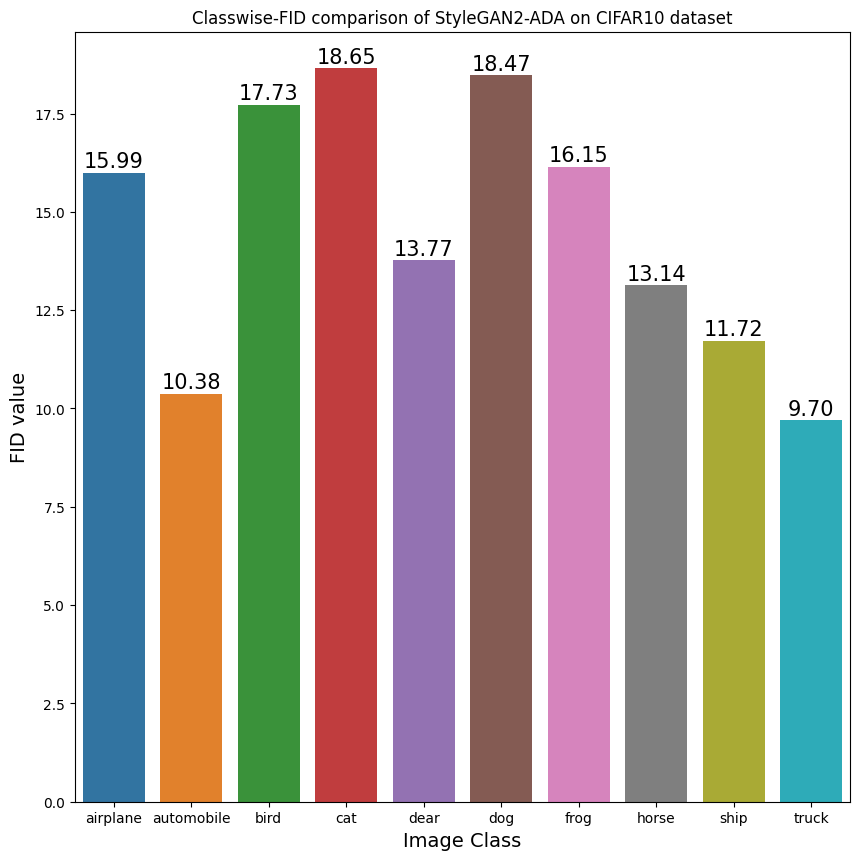

In [20]:
plt.figure(figsize=(10, 10))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Class", y="FID value", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Image Class", size=14)
  
# Setting the label for y-axis
plt.ylabel("FID value", size=14)
  
# Setting the title for the graph
plt.title("Classwise-FID comparison of StyleGAN2-ADA on CIFAR10 dataset")
  
# Fianlly showing the plot
plt.show()

# Class wise KID

It should take roughly 4 minutes to calculate KID for each 10000 images in total. This segment takes the generated images and compares each class with respective class in original dataset.

In [21]:
!pip install torch-fidelity==0.2.0
!git clone 'https://github.com/toshas/torch-fidelity.git'
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/airplane /content/class0 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/automobile /content/class1 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/bird /content/class2 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/cat /content/class3
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/deer /content/class4 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/dog /content/class5 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/frog /content/class6
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/horse /content/class7 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/ship /content/class8 
!python /content/torch-fidelity/torch_fidelity/fidelity.py --gpu 0 --kid /content/output/train/truck /content/class9


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'torch-fidelity'...
remote: Enumerating objects: 799, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 799 (delta 98), reused 86 (delta 86), pack-reused 664
Receiving objects: 100% (799/799), 2.18 MiB | 14.47 MiB/s, done.
Resolving deltas: 100% (489/489), done.
Traceback (most recent call last):
  File "/content/torch-fidelity/torch_fidelity/fidelity.py", line 9, in <module>
    from torch_fidelity.registry import FEATURE_EXTRACTORS_REGISTRY, DATASETS_REGISTRY, SAMPLE_SIMILARITY_REGISTRY, \
ImportError: cannot import name 'SAMPLE_SIMILARITY_REGISTRY' from 'torch_fidelity.registry' (/usr/local/lib/python3.9/dist-packages/torch_fidelity/registry.py)
Traceback (most recent call last):
  File "/content/torch-fidelity/torch_fidelity/fidelity.py", line 9, in <module>
    from torch_fidelity.registry import FEATURE_

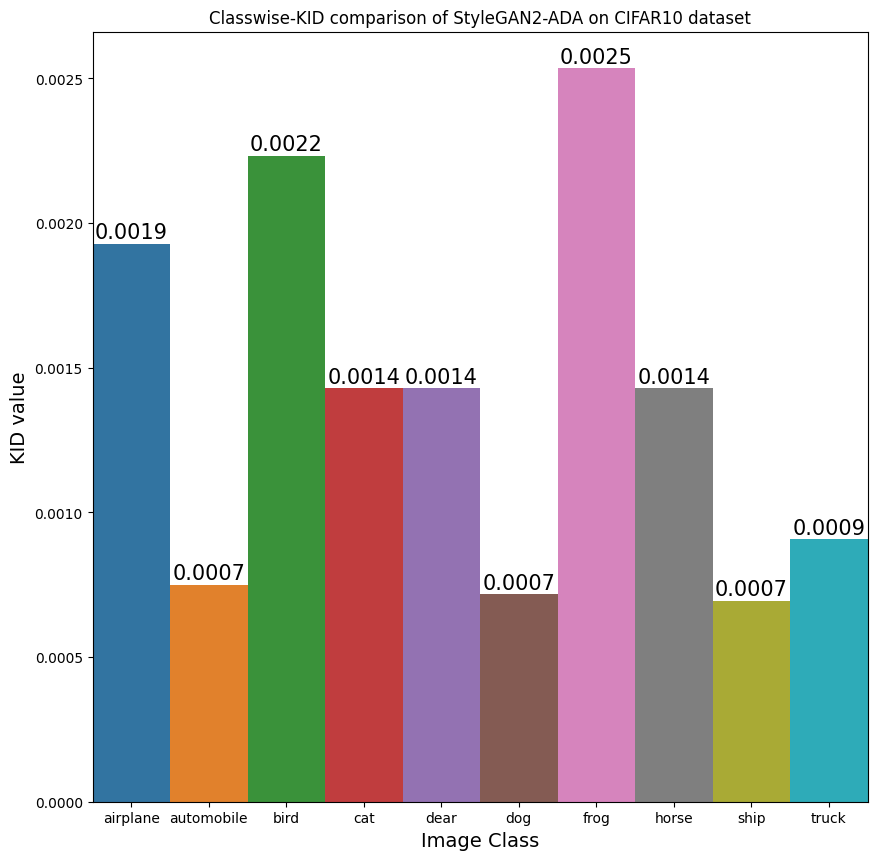

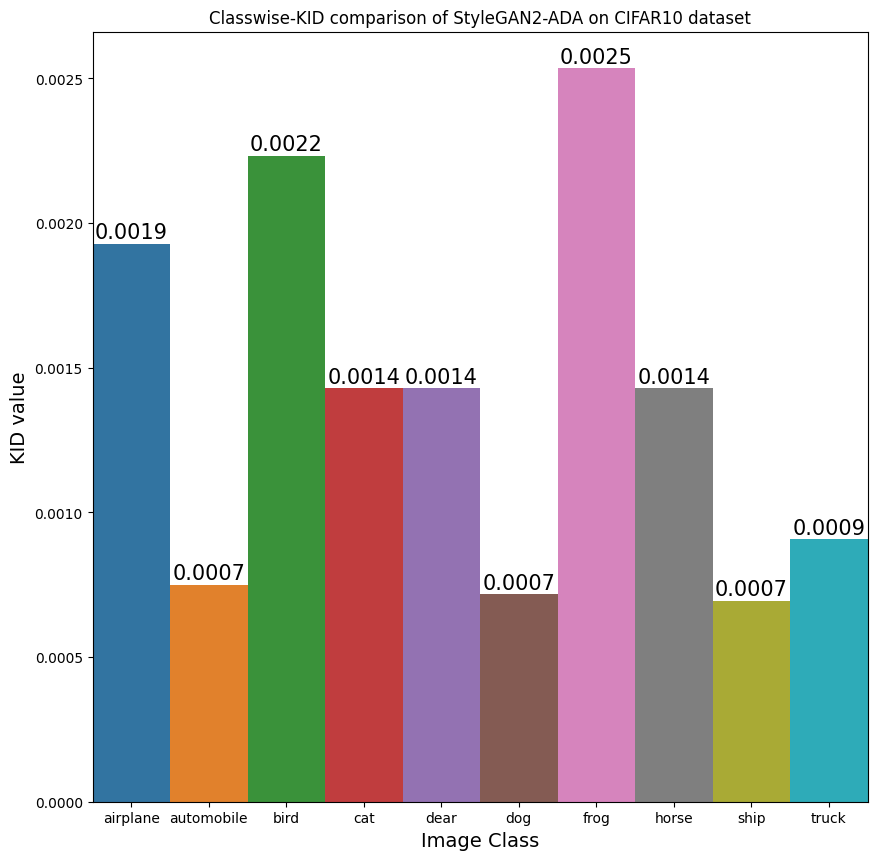

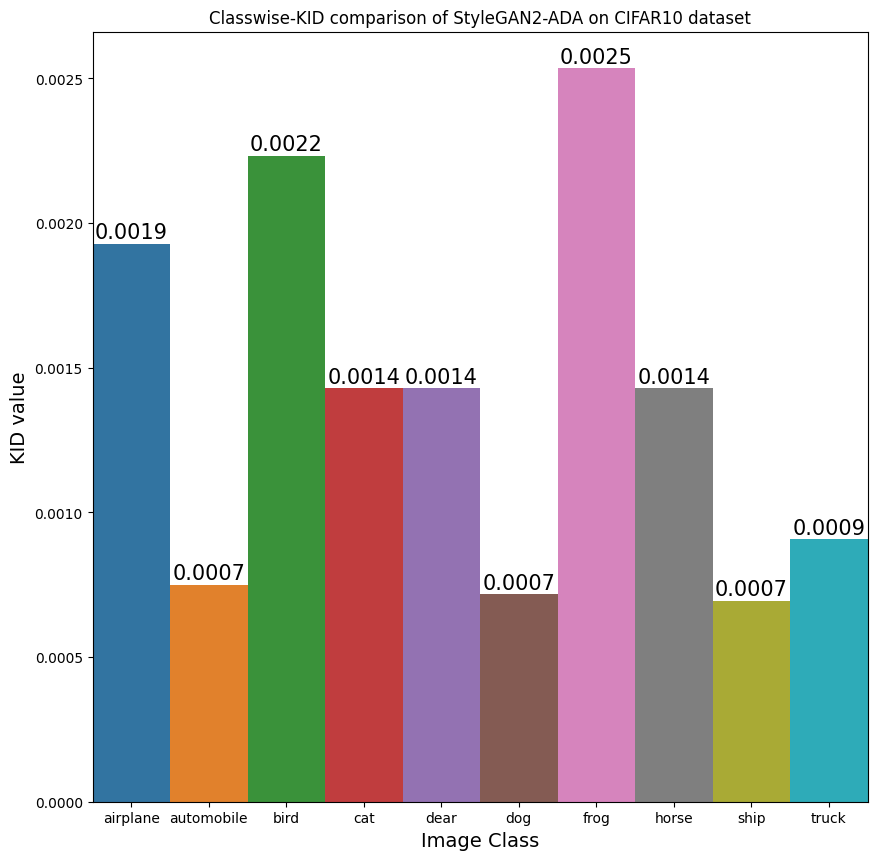

In [22]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'dear','dog', 'frog', 'horse', 'ship', 'truck'])
kids = np.array([ 0.001929053,0.0007491717, 0.002232094,0.001428902,0.001428902 , 0.0007164741, 0.002534912, 0.00142872, 0.0006952117, 0.0009077326 ])
df = pd.DataFrame({'Class':classes, 'KID value':kids})
plt.figure(figsize=(10, 10))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Class", y="KID value", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.4f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(plots, 1)
# Setting the label for x-axis
plt.xlabel("Image Class", size=14)
  
# Setting the label for y-axis
plt.ylabel("KID value", size=14)
  
# Setting the title for the graph
plt.title("Classwise-KID comparison of StyleGAN2-ADA on CIFAR10 dataset")
  
# Fianlly showing the plot
plt.show()